## Data Generation
### Using Scikit-Learn


#### 1. Data For Regression

(1000, 6)
(1000,)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_332\2953004642.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231+i)


'\n# house price dataset\nn_features =6 :\narea of the plot\nnumber of roo ms\netc etc...\n\n'

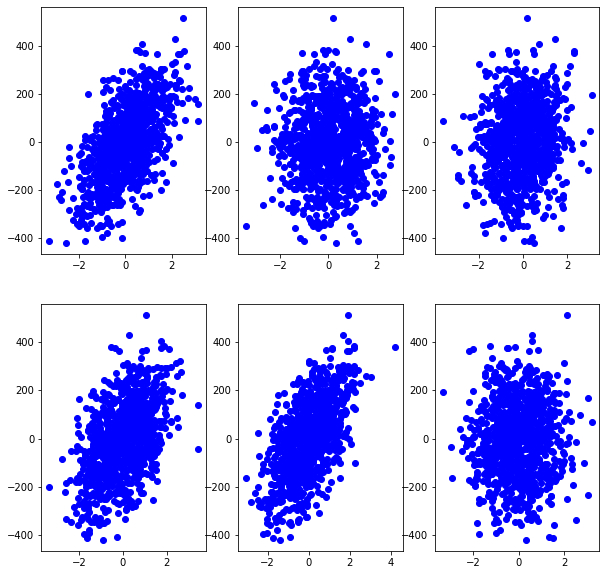

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
X,y = mr(n_samples=1000, n_features=6, noise=0)
print(X.shape)
print(y.shape)

fig2,ax= plt.subplots(3,3,figsize=(10,10))
for i in range(6):
  plt.subplot(231+i)
  plt.scatter(X[:,i],y, color='blue')


"""
# house price dataset
n_features =6 :
area of the plot
number of roo ms
etc etc...

"""

### 2. Data For Classification


(1000, 2)
(1000,)


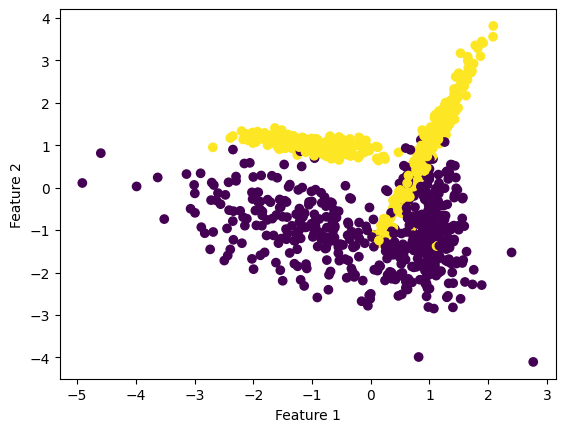

In [ ]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 3. Data For Clustering (Unsupervised Learning)

(1000, 2)
(1000,)


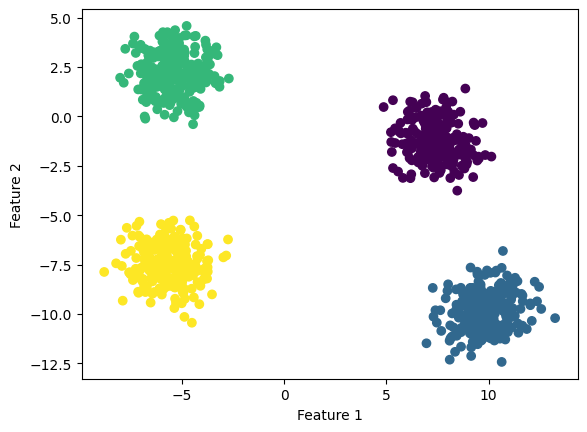

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Web Scraping Example


### Step 1 : Send a "GET" request to the URL.

Status_code 200 indicates that the GET request has been successful. 

In [ ]:
import requests as req
url = 'https://www.mykhel.com/football/indian-super-league-table-l750/'
page= req.get(url)
print(page.status_code)

<Response [200]>


### Step 2 : Parse the HTML using BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')

### Step 3 : Find the tag,class name,id of the required item/container/object in the html file.

In this case, it is a table.
Inspect the webpage to navigate in the HTML document.
As an identification feature, we used the CSS class name of the table. *The word class is followed by a _ .


In [ ]:
table = soup.find('table', class_='os-football-table')
print(table)

### Step 4 : Extract the headers/ column names of the table.

They are present inside the first tag "tr" .

So use table.find('tr') or store all the rows using find_all('tr') and use the first one.

all_rows= table.find_all('tr') and all_rows[0] .

Inside the tr container, there are several th containers that contain the text data. Extract data from each of them by iterating over a loop. Store their text data in a list named headers.

In [ ]:
headers = []
first_row=table.find('tr');

for i in first_row.find_all('th'):
 title = i.text
 headers.append(title)

print(headers)

['Position', 'Teams', 'Played', 'Won', 'Drawn', 'Lost', 'GF', 'GA', 'GD', 'Points', 'Form']


### Step 5 : Store the data inside a Pandas DataFrame.

1. Create a blank DataFrame with the header list as the column names.
2. Iterate over all the rows starting from second.
3. Inside the row containers (enclosed by tr and /tr), the data is present in td containers. Iterate over all of them and store their data in a list.
4. Append the list to the dataframe. This is done by adding the list to that row of the dataframe which has index==current_length of the dataframe. The 'loc' function of pandas come in handy.

In [ ]:
import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row
print(mydata)

   Position             Teams Played Won Drawn Lost  GF  GA   GD Points Form
0         1       Mumbai City     20  14     4    2  54  21   33    46      
1         2         Hyderabad     20  13     3    4  36  16   20    42      
2         3   ATK Mohun Bagan     20  10     4    6  24  17    7    34      
3         4         Bengaluru     20  11     1    8  27  23    4    34      
4         5   Kerala Blasters     20  10     1    9  28  28    0    31      
5         6            Odisha     20   9     3    8  30  32   -2    30      
6         7               Goa     20   8     3    9  36  35    1    27      
7         8     Chennaiyin FC     20   7     6    7  36  37   -1    27      
8         9    SC East Bengal     20   6     1   13  22  38  -16    19      
9        10     Jamshedpur FC     20   5     4   11  21  32  -11    19      
10       11  NorthEast United     20   1     2   17  20  55  -35     5      


### This is an additional step to include the data of the column "Form".

On inspecting the website, we realized that each row of the form column consists of 5 containers with class names of os-win, os-draw and os-loss , each of which renders a circle of specific color in the webpage.

Here, for each row, we went to the last column (the last column had tag td, so we found out all the td and extracted the last one using -1) and then counted the number of containers with class name os-win (find_all os-win and then find the length of that list formed) and put that value in the specific row of the last column.

In [ ]:
x=0
for j in table.find_all('tr')[1:]:
  data=j.find_all('td')[-1]
  di = data.find('div',class_="os-form")
  spa1 = di.find_all('span',class_='os-win')
  l=len(spa1)
  mydata.Form[x]=l
  x+=1

print(mydata)

   Position             Teams Played Won Drawn Lost  GF  GA   GD Points Form
0         1       Mumbai City     20  14     4    2  54  21   33    46     1
1         2         Hyderabad     20  13     3    4  36  16   20    42     2
2         3   ATK Mohun Bagan     20  10     4    6  24  17    7    34     4
3         4         Bengaluru     20  11     1    8  27  23    4    34     4
4         5   Kerala Blasters     20  10     1    9  28  28    0    31     1
5         6            Odisha     20   9     3    8  30  32   -2    30     2
6         7               Goa     20   8     3    9  36  35    1    27     1
7         8     Chennaiyin FC     20   7     6    7  36  37   -1    27     3
8         9    SC East Bengal     20   6     1   13  22  38  -16    19     2
9        10     Jamshedpur FC     20   5     4   11  21  32  -11    19     3
10       11  NorthEast United     20   1     2   17  20  55  -35     5     0


# End of Part 1

# Data PreProcessing
## Importing data from Sklearn/Kaggle etc.
Many libraries and websites provide pre-made datasets. Visit [Kaggle](https://www.kaggle.com/datasets) to explore some of the datsets it hosts.

For now, we will be use the Sklearn Library to get the titanic dataset.

In [1]:
from sklearn.datasets import fetch_openml
data = fetch_openml('titanic', version=1, as_frame=True)
df = data.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Step 1: Understanding the data

### 1.1 df.head() 
is a method used in pandas, a popular data analysis library in Python, to display the first few rows of a DataFrame.

The method returns a new DataFrame containing the first n rows of the original DataFrame, where n is the number specified in the parentheses. By default, n is set to 5.

In [2]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


### 1.2 df.info() 
is a method in pandas that provides a summary of the DataFrame's metadata. It returns information about the DataFrame, such as:

* The number of rows and columns in the DataFrame
* The data type of each column
* The number of non-null values in each column
* The memory usage of the DataFrame

This method is particularly useful for gaining a quick understanding of the DataFrame's data types and whether there are any missing values. It can also help identify any potential issues with the data, such as columns with mixed data types. Additionally, it can be used to check the memory usage of the DataFrame, which can be important when working with large datasets.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


### 1.3 df.describe()
is a method to generate descriptive statistics of the numerical columns of the data. It displays the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [4]:
df.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


### Column Names
### 1.4 cols=df.columns
is a method in pandas that returns the column labels of the DataFrame as a pandas Index object. The column labels can be used to subset or manipulate the DataFrame. This method is useful for quickly obtaining the column labels of the DataFrame without having to manually type them out.

In [5]:
cols = df.columns
print(cols)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


### 1.5 df.unique() and df.nunique()
They are used to display all the unique values in a dataframe and the number of unique values in a dataframe respectively.  df.col_name.unique() and df.col_name.nunique() does the same for a colume.   Note : df.col_name and df["col_name"] are identical.

In [6]:
for col in cols:
    print("{} has {} unique values".format(col,df[col].nunique()))

pclass has 3 unique values
survived has 2 unique values
name has 1307 unique values
sex has 2 unique values
age has 98 unique values
sibsp has 7 unique values
parch has 8 unique values
ticket has 929 unique values
fare has 281 unique values
cabin has 186 unique values
embarked has 3 unique values
boat has 27 unique values
body has 121 unique values
home.dest has 369 unique values


# Step 2 : Null Values

### 2.1 df.isna().sum()
is a chained method that is often used with df.isna(). It calculates the total number of missing values (null or NaN) in each column of the DataFrame. Specifically, it returns a Series object that shows the count of missing values for each column of the DataFrame.

In [7]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Dropping out columns with excessive null values.

### 2.2 df.drop()
Sometimes, too much of your data is missing for a particular feature. Eg, try running df.isna().sum() again and you will find that the feature Cabin has 1014 missing values. 

Likewise, the feature "boat" has 823 missing values.
It only makes sense to remove such features from our dataset.

Again, if you find out that some feature name does not make sense in a dataset, that feature should be dropped. Here, name and ticket number has no relation to whether a person survived or not.

df.drop() can also delete rows. To delete rows, pass in the row indexes as labels and axis=0.

axis=1 refers to column and axis=0 refers to rows.

In [8]:
df = df.drop(['cabin', 'boat', 'name','ticket','body',"home.dest"], axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0,female,25.0000,1.0,2.0,151.5500,S


## Filling the Null Values

### 2.3.1 For numerical columns.
### df.fillna()
Is a method in pandas that is used to fill missing or null values in a DataFrame. It can be used to fill in missing values with a specified value or with values computed from other data in the DataFrame, such as the mean, median or mode. The method can also be used to forward or backward fill missing values to carry forward the last known value or the next known value, respectively.

Refer to <a href = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute">sklearn.impute</a> for more ways of filling in missing values. 

In [9]:
# df.fillna(df.mean(), inplace=True)
df.fillna(df.median(), inplace=True)

<ipython-input-9-dec89c434036>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [10]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

### 2.3.2 For Categorical columns.
As we can see there are 2 values missing in the feature "embarked" and 564 in the feature "home.dest"

One way is to replace the missing values with value with maximum frequence of occurance. This is obviously a method with obvious flaws, but is our best shot.

The other option is to just drop this feature (as discussed earlier)

In [11]:
# Fill NaN values with mode for column
df['embarked'] = df['embarked'].fillna(df['embarked'].mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1309 non-null   float64 
 7   embarked  1309 non-null   category
dtypes: category(3), float64(5)
memory usage: 55.5 KB


# Step 3: Duplicate rows
### 3.1 df.duplicated().sum()
The df.duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not. The df.duplicated().sum() returns the number of rows which have more than one occurance in the dataframe.

In [12]:
df.duplicated().sum()

202

### 3.2 df.drop_duplicates()
is a method in pandas that is used to remove duplicate rows from a DataFrame. By default, it removes all rows that are completely identical to a previous row. It can also be used to remove duplicate rows based on a subset of columns. This method is useful when ensuring that each row in the DataFrame is unique and that no data is duplicated.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1107 non-null   float64 
 1   survived  1107 non-null   category
 2   sex       1107 non-null   category
 3   age       1107 non-null   float64 
 4   sibsp     1107 non-null   float64 
 5   parch     1107 non-null   float64 
 6   fare      1107 non-null   float64 
 7   embarked  1107 non-null   category
dtypes: category(3), float64(5)
memory usage: 55.5 KB


# Step 4: Normalization and Standardization of Numerical Data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html">Normalization</a> is the process of converting a range of values into a standard range of values, typically in the interval [-1, 1] or [0, 1]. It's not a strict requirement but it improves the speed of learning (e.g. faster convergence in gradient descent) and prevents numerical overflow.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Standardization</a> is the process of rescaling the attributes so that they have mean as 0 and variance as 1. It brings down all the features to a common scale without distorting the differences in the range of the values.

In this dataset, let's normalize the fare column and standardize the age column. We are doing this randomly just to show how its done!!

In [15]:
cols=df.columns
for col in cols:
    print("{} has datatype {} and has {} unique values".format(col,df[col].dtype,df[col].nunique()))

pclass has datatype float64 and has 3 unique values
survived has datatype category and has 2 unique values
sex has datatype category and has 2 unique values
age has datatype float64 and has 98 unique values
sibsp has datatype float64 and has 7 unique values
parch has datatype float64 and has 8 unique values
fare has datatype float64 and has 281 unique values
embarked has datatype category and has 3 unique values


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
arr= np.array(df['fare'])
minmax= MinMaxScaler()
df['fare']=minmax.fit_transform(arr.reshape(-1,1))
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,female,29.0000,0.0,0.0,0.412503,S
1,1.0,1,male,0.9167,1.0,2.0,0.295806,S
2,1.0,0,female,2.0000,1.0,2.0,0.295806,S
3,1.0,0,male,30.0000,1.0,2.0,0.295806,S
4,1.0,0,female,25.0000,1.0,2.0,0.295806,S


In [18]:
from sklearn.preprocessing import StandardScaler
arr= np.array(df['age']) #This has to be done only if one column is standardized. For more than one column, it is simple.
scaler = StandardScaler()
df['age']=scaler.fit_transform(arr.reshape(-1,1))
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,female,-0.060648,0.0,0.0,0.412503,S
1,1.0,1,male,-2.092555,1.0,2.0,0.295806,S
2,1.0,0,female,-2.014175,1.0,2.0,0.295806,S
3,1.0,0,male,0.011705,1.0,2.0,0.295806,S
4,1.0,0,female,-0.350059,1.0,2.0,0.295806,S


# Step 5: Encoding Categorical Data
Categorical data is data that represents categories or labels, such as color, type, or sex. In order to use categorical data in machine learning models, it needs to be transformed into numerical data.


* Ordinal encoding is a method of encoding categorical data where each unique category is assigned an integer value. The assigned integers are based on the order of the categories, which may not be meaningful in all cases. For example, if we have a categorical variable "size" with three categories - small, medium, and large - we could assign the values 0, 1, and 2 respectively. However, this method assumes that there is an inherent order to the categories, which may not always be true.

* One-hot encoding, on the other hand, is a method of encoding categorical data where each unique category is transformed into a binary vector. Each binary vector has a length equal to the number of unique categories, with a value of 1 in the corresponding index of the category and 0 in all other indices. For example, if we have a categorical variable "color" with three categories - red, blue, and green - we could transform it into three binary vectors [1,0,0], [0,1,0], and [0,0,1], respectively. This method avoids the assumption of an inherent order to the categories and works well with machine learning algorithms.

In Python, you can use the `sklearn.preprocessing` module to perform both ordinal and one-hot encoding. The `OrdinalEncoder` class can be used for ordinal (or label) encoding, while the `OneHotEncoder` class can be used for one-hot encoding. Additionally, pandas provides a `get_dummies()` function which can be used for one-hot encoding of categorical variables.


After encoding the categorical data to numbers, we can retrieve the categorical values using the inverse_transform function.

In [19]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
df["survived"]=le1.fit_transform(df["survived"])
df["embarked"]=le1.fit_transform(df["embarked"])

df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,female,-0.060648,0.0,0.0,0.412503,2
1,1.0,1,male,-2.092555,1.0,2.0,0.295806,2
2,1.0,0,female,-2.014175,1.0,2.0,0.295806,2
3,1.0,0,male,0.011705,1.0,2.0,0.295806,2
4,1.0,0,female,-0.350059,1.0,2.0,0.295806,2


In [22]:
# We prefer this method as it generates the column names itself.
import pandas as pd
df_encoded = pd.get_dummies(df['sex'])
df_encoded

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1303,0,1
1304,1,0
1306,0,1
1307,0,1


In [23]:
df=pd.concat([df,df_encoded],axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,female,male
0,1.0,1,female,-0.060648,0.0,0.0,0.412503,2,1,0
1,1.0,1,male,-2.092555,1.0,2.0,0.295806,2,0,1
2,1.0,0,female,-2.014175,1.0,2.0,0.295806,2,1,0
3,1.0,0,male,0.011705,1.0,2.0,0.295806,2,0,1
4,1.0,0,female,-0.350059,1.0,2.0,0.295806,2,1,0


In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
arr= np.array(df['sex'])
col=["female","male"] #Here, you need to specify column names.
df[col]=ohe.fit_transform(arr.reshape(-1,1)).toarray()

df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,female,male
0,1.0,1,female,-0.060648,0.0,0.0,0.412503,2,1.0,0.0
1,1.0,1,male,-2.092555,1.0,2.0,0.295806,2,0.0,1.0
2,1.0,0,female,-2.014175,1.0,2.0,0.295806,2,1.0,0.0
3,1.0,0,male,0.011705,1.0,2.0,0.295806,2,0.0,1.0
4,1.0,0,female,-0.350059,1.0,2.0,0.295806,2,1.0,0.0


# Looking for imbalance in dataset for classification tasks.

Consider a classification dataset of 1000 samples and 2 classes such that 900 samples belong to the first class and 100 samples belong to the second. In such situation, the dataset is said to have imbalanced classes. Examples of such datasets are Cancer detection and bank fraudulent transactions.

When the samples of a certain class are much more than the other class, our model may get biased towards the prediction. To fix it, we try to balance the classes by resampling our dataset. Resampling refers to 2 techniques : oversampling the minority class or undersampling the majority class. <a href="https://encord.com/blog/an-introduction-to-balanced-and-imbalanced-datasets-in-machine-learning/">Read this</a>

All these comes under Data Augmentation.

Refer to this <a href="https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/">website</a> to learn how to implement SMOTE, an algorithm to oversample minority class. For other methods, refer to this <a href="https://imbalanced-learn.org/stable/references/index.html#api">website</a> .
